# Evaluating whilst ensuring model consistency by solving equality constraints
Plot equality constraints and their componenents whilst varying the parameters used to solve them.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import process
from process.main import SingleRun

Initialise models with LT solution.

In [2]:
single_run = SingleRun("large_tokamak_sol_IN.DAT")
single_run.run()

The IN.DAT file does not contain any obsolete variables.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
 Version : 3.1.0
 Git Tag : v3.1.0-370-ge32ef5470
 Git Branch : main
 Date : 15/05/2025 UTC
 Time : 15:03
 User : jon
 Computer : jon-Precision-3560
 Directory : /home/jon/code/notebooks/model_consistency
 Input : /home/jon/code/notebooks/model_consistency/large_tokamak_sol_IN.DAT
 Run title : generic large tokamak
 Run type : Reactor concept design: Pulsed tokamak model model, (c) UK Atomic Energy Authority
 
 ****************************************************************************

/home/jon/code/process/process/init.py:80: UserWarning: tmargmin_cs and tmargmin should not both be specified in IN.DAT tmargmin_cs has been ignored
  check_process(inputs)
/home/jon/code/process/process/physics.py:6985: RuntimeWarning: divide by zero encountered in divide
  * (neped / n_greenwald) ** -0.174
process.pfcoil - WARNING - Ratio of central solenoid overall current density at beginning of flat-top / end of flat-top > 1 (|f_j_cs_start_end_flat_top| > 1)
/home/jon/code/process/process/costs.py:2804: RuntimeWarning: invalid value encountered in sqrt
  annoam = cost_variables.ucoam[cost_variables.lsa - 1] * np.sqrt(
/home/jon/code/process/process/costs.py:2873: RuntimeWarning: invalid value encountered in sqrt
  annwst = cost_variables.ucwst[cost_variables.lsa - 1] * np.sqrt(
process.power - ERROR - ERROR Negative stored energy in poloidal field


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowan

## Parameter study of Te on global power balance
Vary Te, check effect on global power balance constraint.

In [3]:
def run_con2(obj, name, values):
    """Calculate responses to W impurities."""
    n = te.shape[0]
    con2 = np.empty(n)
    pden_electron_transport_loss_mw = np.empty(n)
    pden_ion_transport_loss_mw = np.empty(n)
    pden_plasma_rad_mw = np.empty(n)
    f_alpha_plasma = np.empty(n)
    alpha_power_density_total = np.empty(n)
    charged_power_density = np.empty(n)
    pden_plasma_ohmic_mw = np.empty(n)

    # Loop over W impurity values, evaluate model and store responses at each point
    for i, value in enumerate(values):
        # Set W impurity fraction, then run all models
        setattr(obj, name, value)

        # Evaluate models
        single_run.run_scan(solver=None)

        # Evaluate constraint equation 15 (L-H threshold constraint)
        con2_value, _, _, _, _ = process.fortran.constraints.constraint_eqn_002()

        # Need to copy values
        pden_electron_transport_loss_mw[i] = (
            process.fortran.physics_variables.pden_electron_transport_loss_mw.item()
        )
        pden_ion_transport_loss_mw[i] = (
            process.fortran.physics_variables.pden_ion_transport_loss_mw.item()
        )
        pden_plasma_rad_mw[i] = (
            process.fortran.physics_variables.pden_plasma_rad_mw.item()
        )
        f_alpha_plasma[i] = process.fortran.physics_variables.f_alpha_plasma.item()
        alpha_power_density_total[i] = (
            process.fortran.physics_variables.alpha_power_density_total.item()
        )
        charged_power_density[i] = (
            process.fortran.physics_variables.charged_power_density.item()
        )
        pden_plasma_ohmic_mw[i] = (
            process.fortran.physics_variables.pden_plasma_ohmic_mw.item()
        )

        # Need to flip sign of constraint so negative means violated
        con2[i] = -con2_value

    return (
        pden_electron_transport_loss_mw,
        pden_ion_transport_loss_mw,
        pden_plasma_rad_mw,
        f_alpha_plasma,
        alpha_power_density_total,
        charged_power_density,
        pden_plasma_ohmic_mw,
        con2,
    )


# Run te parameter study
# 1.33302614961685215e+01 at solution
te = np.linspace(1.0e1, 1.5e1, 20)
(
    pden_electron_transport_loss_mw,
    pden_ion_transport_loss_mw,
    pden_plasma_rad_mw,
    f_alpha_plasma,
    alpha_power_density_total,
    charged_power_density,
    pden_plasma_ohmic_mw,
    con2,
) = run_con2(process.fortran.physics_variables, "te", te)

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering 

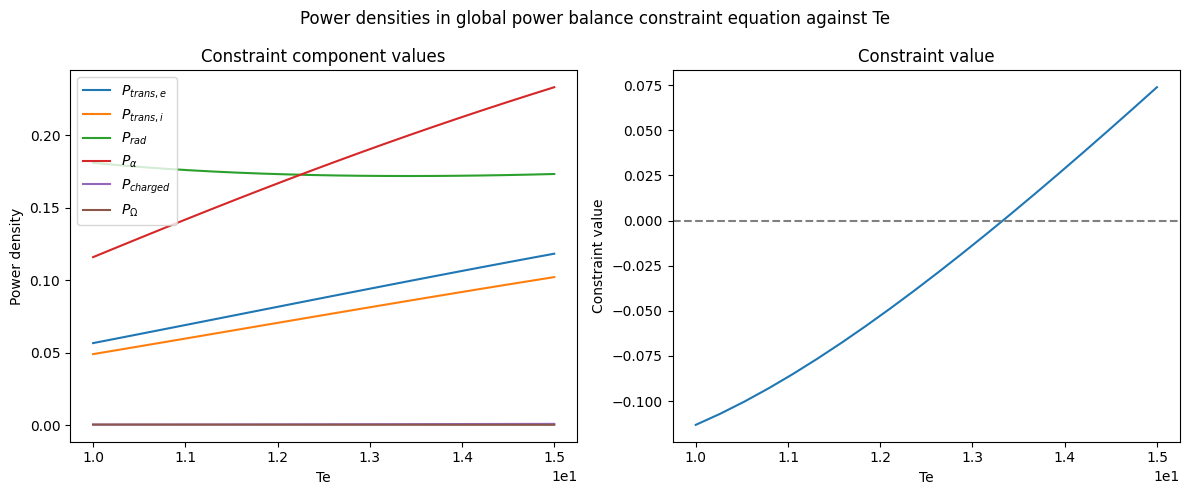

In [4]:
# Plot
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
ax[0].plot(te, pden_electron_transport_loss_mw, label="$P_{trans, e}$")
ax[0].plot(te, pden_ion_transport_loss_mw, label="$P_{trans, i}$")
ax[0].plot(te, pden_plasma_rad_mw, label="$P_{rad}$")
# ax[0].plot(te, f_alpha_plasma, label="f_alpha_plasma")
ax[0].plot(te, alpha_power_density_total, label=r"$P_{\alpha}$")
ax[0].plot(te, charged_power_density, label="$P_{charged}$")
ax[0].plot(te, pden_plasma_ohmic_mw, label="$P_{\Omega}$")
ax[0].ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
ax[0].set_xlabel("Te")
ax[0].set_ylabel("Power density")
ax[0].legend()
ax[0].set_title("Constraint component values")

ax[1].plot(te, con2, label="con2")
ax[1].axhline(0.0, ls="--", color="grey")
ax[1].set_xlabel("Te")
ax[1].set_ylabel("Constraint value")
ax[1].set_title("Constraint value")
ax[1].ticklabel_format(style="sci", axis="x", scilimits=(0, 0))

fig.suptitle("Power densities in global power balance constraint equation against Te")
fig.tight_layout()

The PPB constraint can be modulated using Te; the components can be seen to change.

### Parameter study of ne on global power balance

In [5]:
# Reset te to solution value
single_run = SingleRun("large_tokamak_sol_IN.DAT")
single_run.run()

ne = np.linspace(5.0e19, 9.0e19, 20)

(
    pden_electron_transport_loss_mw,
    pden_ion_transport_loss_mw,
    pden_plasma_rad_mw,
    f_alpha_plasma,
    alpha_power_density_total,
    charged_power_density,
    pden_plasma_ohmic_mw,
    con2,
) = run_con2(process.fortran.physics_variables, "dene", ne)

process.pfcoil - WARNING - Ratio of central solenoid overall current density at beginning of flat-top / end of flat-top > 1 (|f_j_cs_start_end_flat_top| > 1)
process.power - ERROR - ERROR Negative stored energy in poloidal field


The IN.DAT file does not contain any obsolete variables.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
 Version : 3.1.0
 Git Tag : v3.1.0-370-ge32ef5470
 Git Branch : main
 Date : 15/05/2025 UTC
 Time : 15:03
 User : jon
 Computer : jon-Precision-3560
 Directory : /home/jon/code/notebooks/model_consistency
 Input : /home/jon/code/notebooks/model_consistency/large_tokamak_sol_IN.DAT
 Run title : generic large tokamak
 Run type : Reactor concept design: Pulsed tokamak model model, (c) UK Atomic Energy Authority
 
 ****************************************************************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


   2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
213     2   NCORE: Central density is less than pedestal density                            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
213     2   NCORE: Central density is less than pedestal density                            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 should

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 2   NCORE: Central density is less than pedestal density                            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
213     2   NCORE: Central density is less than pedestal density                            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
213     2   NCORE: Central density is less than

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

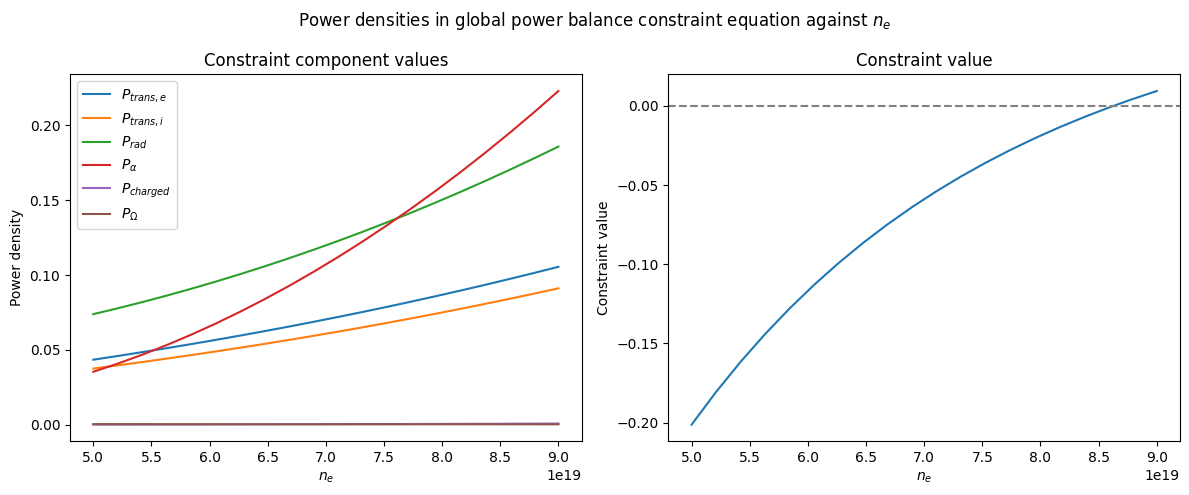

In [6]:
# Plot
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
ax[0].plot(ne, pden_electron_transport_loss_mw, label="$P_{trans, e}$")
ax[0].plot(ne, pden_ion_transport_loss_mw, label="$P_{trans, i}$")
ax[0].plot(ne, pden_plasma_rad_mw, label="$P_{rad}$")
# ax[0].plot(ne, f_alpha_plasma, label="f_alpha_plasma")
ax[0].plot(ne, alpha_power_density_total, label=r"$P_{\alpha}$")
ax[0].plot(ne, charged_power_density, label="$P_{charged}$")
ax[0].plot(ne, pden_plasma_ohmic_mw, label="$P_{\Omega}$")
ax[0].ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
ax[0].set_xlabel("$n_e$")
ax[0].set_ylabel("Power density")
ax[0].legend()
ax[0].set_title("Constraint component values")

ax[1].plot(ne, con2, label="con2")
ax[1].axhline(0.0, ls="--", color="grey")
ax[1].set_xlabel("$n_e$")
ax[1].set_ylabel("Constraint value")
ax[1].set_title("Constraint value")
ax[1].ticklabel_format(style="sci", axis="x", scilimits=(0, 0))

fig.suptitle(
    "Power densities in global power balance constraint equation against $n_e$"
)
fig.tight_layout()

## Parameter study of ne on beta consistency
Vary ne, check effect beta consistency constraint.

In [7]:
# Reset te to solution value
single_run = SingleRun("large_tokamak_sol_IN.DAT")
single_run.run()


def run_con1(obj, name, values):
    """Calculate responses to ne."""
    n = ne.shape[0]
    con1 = np.empty(n)
    beta_fast_alpha = np.empty(n)
    beta_beam = np.empty(n)
    ten = np.empty(n)
    nd_ions_total = np.empty(n)
    tin = np.empty(n)
    btot = np.empty(n)
    beta = np.empty(n)

    # Loop over W impurity values, evaluate model and store responses at each point
    for i, value in enumerate(values):
        # Set W impurity fraction, then run all models
        setattr(obj, name, value)

        # Evaluate models
        single_run.run_scan(solver=None)

        # Evaluate constraint equation 15 (L-H threshold constraint)
        con1_value, _, _, _, _ = process.fortran.constraints.constraint_eqn_001()

        # Need to copy values
        beta_fast_alpha[i] = process.fortran.physics_variables.beta_fast_alpha.item()
        beta_beam[i] = process.fortran.physics_variables.beta_beam.item()
        ten[i] = process.fortran.physics_variables.ten.item()
        nd_ions_total[i] = process.fortran.physics_variables.nd_ions_total.item()
        tin[i] = process.fortran.physics_variables.tin.item()
        btot[i] = process.fortran.physics_variables.btot.item()
        beta[i] = process.fortran.physics_variables.beta.item()

        # Need to flip sign of constraint so negative means violated
        con1[i] = -con1_value

    return (
        beta_fast_alpha,
        beta_beam,
        ten,
        nd_ions_total,
        tin,
        btot,
        beta,
        con1,
    )


# Run ne parameter study
# 8.62771644648059372e+19 at solution
ne = np.linspace(5.0e19, 9.0e19, 20)
(
    beta_fast_alpha,
    beta_beam,
    ten,
    nd_ions_total,
    tin,
    btot,
    beta,
    con1,
) = run_con1(process.fortran.physics_variables, "dene", ne)

process.pfcoil - WARNING - Ratio of central solenoid overall current density at beginning of flat-top / end of flat-top > 1 (|f_j_cs_start_end_flat_top| > 1)
process.power - ERROR - ERROR Negative stored energy in poloidal field


The IN.DAT file does not contain any obsolete variables.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
 Version : 3.1.0
 Git Tag : v3.1.0-370-ge32ef5470
 Git Branch : main
 Date : 15/05/2025 UTC
 Time : 15:04
 User : jon
 Computer : jon-Precision-3560
 Directory : /home/jon/code/notebooks/model_consistency
 Input : /home/jon/code/notebooks/model_consistency/large_tokamak_sol_IN.DAT
 Run title : generic large tokamak
 Run type : Reactor concept design: Pulsed tokamak model model, (c) UK Atomic Energy Authority
 
 ****************************************************************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

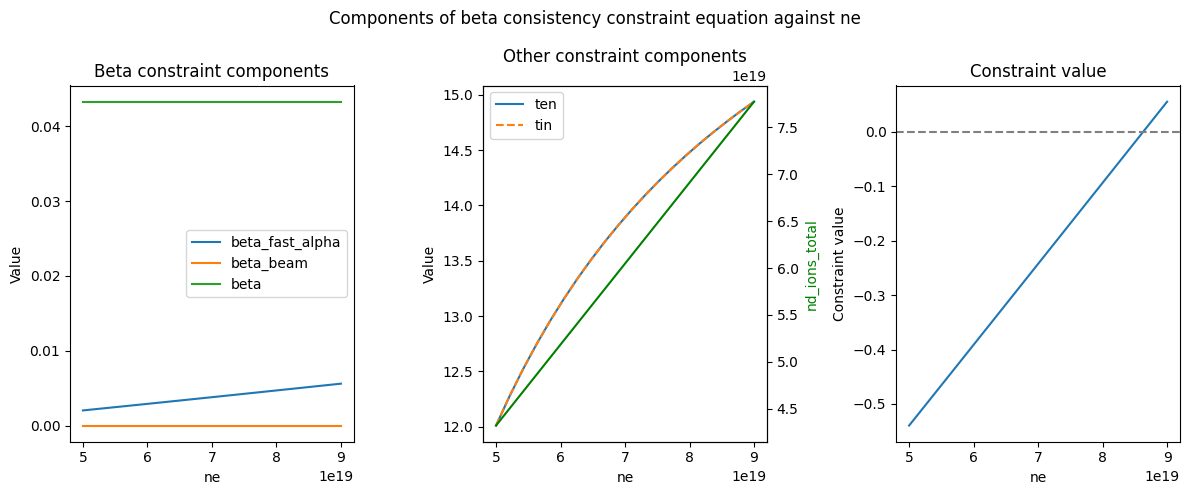

In [8]:
# Plot
fig, ax = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
ax[0].plot(ne, beta_fast_alpha, label="beta_fast_alpha")
ax[0].plot(ne, beta_beam, label="beta_beam")
ax[0].plot(ne, beta, label="beta")
ax[0].ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
ax[0].set_xlabel("ne")
ax[0].set_ylabel("Value")
ax[0].set_title("Beta constraint components")
ax[0].legend()

ax[1].plot(ne, ten, label="ten")
ax[1].plot(ne, tin, label="tin", ls="--")
# ax[1].plot(ne, btot, label="btot")
ax[1].ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
ax[1].set_xlabel("ne")
ax[1].set_ylabel("Value")
ax[1].set_title("Other constraint components")
ax1r = ax[1].twinx()
ax1r.plot(ne, nd_ions_total, label="nd_ions_total", color="g")
ax1r.set_ylabel("nd_ions_total", color="g")
ax[1].legend()

ax[2].plot(ne, con1, label="con1")
ax[2].axhline(0.0, ls="--", color="grey")
ax[2].set_xlabel("ne")
ax[2].set_ylabel("Constraint value")
ax[2].set_title("Constraint value")

fig.suptitle("Components of beta consistency constraint equation against ne")
fig.tight_layout()

ne is used to control beta constraint.

### Parameter study of beta constraint against te

In [9]:
# Reset te to solution value
single_run = SingleRun("large_tokamak_sol_IN.DAT")
single_run.run()
(
    beta_fast_alpha,
    beta_beam,
    ten,
    nd_ions_total,
    tin,
    btot,
    beta,
    con1,
) = run_con1(process.fortran.physics_variables, "te", te)

process.pfcoil - WARNING - Ratio of central solenoid overall current density at beginning of flat-top / end of flat-top > 1 (|f_j_cs_start_end_flat_top| > 1)


The IN.DAT file does not contain any obsolete variables.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
 Version : 3.1.0
 Git Tag : v3.1.0-370-ge32ef5470
 Git Branch : main
 Date : 15/05/2025 UTC
 Time : 15:04
 User : jon
 Computer : jon-Precision-3560
 Directory : /home/jon/code/notebooks/model_consistency
 Input : /home/jon/code/notebooks/model_consistency/large_tokamak_sol_IN.DAT
 Run title : generic large tokamak
 Run type : Reactor concept design: Pulsed tokamak model model, (c) UK Atomic Energy Authority
 
 ****************************************************************************

process.power - ERROR - ERROR Negative stored energy in poloidal field


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowan

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


ulated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tf

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


ering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic shouldn't be above 0.7 for engineering reliability.            
  
244     2   PHY

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.00000E+01
  
286     2   [pfcoil][cntrpost]: fjohc shouldn't be above 0.7 for engineering reliability.   
  
287     2   [pfcoil][cntrpost]: fjohc0 shouldn't be above 0.7 for engineering reliability.  
  
285     2   [tfcoil]: fiooic sho

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -9.45335E+05
   2)   -3.50881E+04
   3)    3.71174E-02
   4)    1.

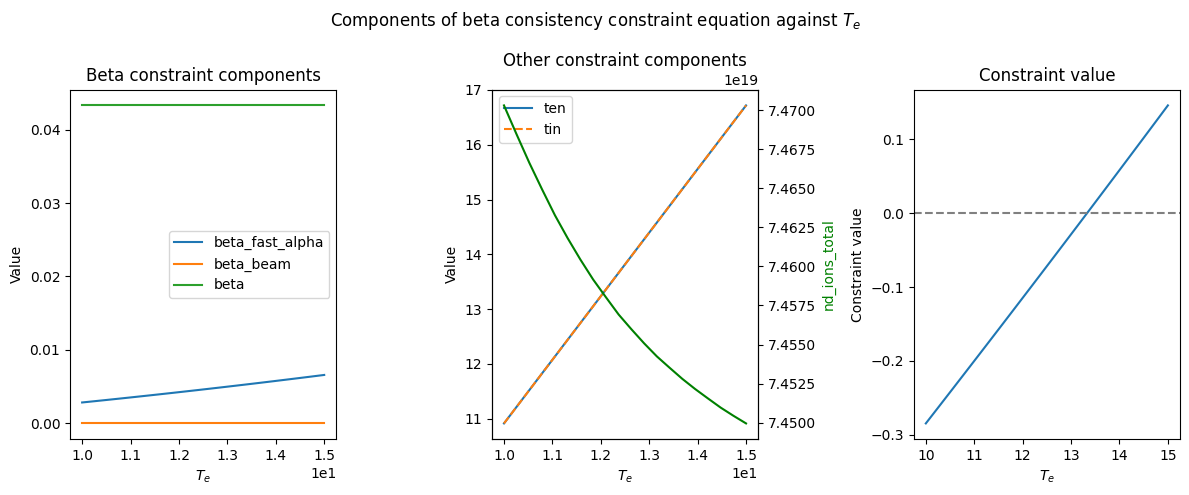

In [10]:
# Plot
fig, ax = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
ax[0].plot(te, beta_fast_alpha, label="beta_fast_alpha")
ax[0].plot(te, beta_beam, label="beta_beam")
ax[0].plot(te, beta, label="beta")
ax[0].ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
ax[0].set_xlabel("$T_e$")
ax[0].set_ylabel("Value")
ax[0].set_title("Beta constraint components")
ax[0].legend()

ax[1].plot(te, ten, label="ten")
ax[1].plot(te, tin, label="tin", ls="--")
# ax[1].plot(te, btot, label="btot")
ax[1].ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
ax[1].set_xlabel("$T_e$")
ax[1].set_ylabel("Value")
ax[1].set_title("Other constraint components")
ax1r = ax[1].twinx()
ax1r.plot(te, nd_ions_total, label="nd_ions_total", color="g")
ax1r.set_ylabel("nd_ions_total", color="g")
ax[1].legend()

ax[2].plot(te, con1, label="con1")
ax[2].axhline(0.0, ls="--", color="grey")
ax[2].set_xlabel("$T_e$")
ax[2].set_ylabel("Constraint value")
ax[2].set_title("Constraint value")

fig.suptitle("Components of beta consistency constraint equation against $T_e$")
fig.tight_layout()

Power balance solved for $T_e$ only, $\beta$ solved for $T_e$ and $n_e$.